# **1. Acceso a dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ajusta esta ruta a donde está tu archivo inmail.1
email_path = "/content/drive/MyDrive/IA ML/salida/data/inmail.1"

print("Archivo a leer:", email_path)


Mounted at /content/drive
Archivo a leer: /content/drive/MyDrive/IA ML/salida/data/inmail.1


# **2. Leer un email con tu código**

In [ ]:
import email

with open(email_path, "r", encoding="latin-1") as file:
    email_content = file.read()

msg = email.message_from_string(email_content)

from_address = msg["FROM"]
to_address = msg["To"]
subject = msg["Subject"]
body = msg.get_payload()

# Mostrar información
print("Remitente:", from_address)
print("Destinatario:", to_address)
print("Asunto:", subject)
print("Cuerpo del mensaje (longitud):", body)
print("Tipo de contenido:", msg.get_content_type())


Remitente: Laia Cardona <comunicacion@cyberclick.net>
Destinatario: umaker.group@gmail.com
Asunto: =?utf-8?Q?165_ideas_de_marketing_digital_?=
 =?utf-8?Q?para_2025._=C2=A1Ebook_gratuito!_=F0=9F=9A=80=C2=A0?=
Cuerpo del mensaje (longitud): [<email.message.Message object at 0x7deb122e3290>, <email.message.Message object at 0x7deb1215afc0>]
Tipo de contenido: multipart/alternative


# **3. Preprocesamiento**

*Elimina HTML, tokeniza, reduce a raiz y quita palabras vacias*

In [ ]:
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []
    def handle_data(self,d):
        self.fed.append(d)
    def get_data(self):
        return "".join(self.fed)

In [ ]:
def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [ ]:
import email
import nltk
import string
nltk.download('stopwords')


class Parser:
    def __init__(self):
        self.stemmer = nltk.PorterStemmer() #raiz
        self.stopwords = set(nltk.corpus.stopwords.words("spanish"))  # palabras vacías
        self.punctuation = list(string.punctuation)
    def parser(self,email_path):
        with open(email_path, errors = "ignore") as e:
            msg = email.message_from_file(e)
        return self.get_email_content(msg)
    def get_email_content(self,msg):
        """Extrae el contenido del Email"""
        subject = self.tokenize(msg["subject"])
        body = self.get_email_body(msg.get_payload(),msg.get_content_type())
        content_type = msg.get_content_type()
        return {
            "Subject": subject,
            "Body": body,
            "content_type": content_type
        }
    def tokenize(self,text):
        for c in self.punctuation:
            text = text.replace(c,"")
        text = text.replace("\t","")
        text = text.replace("\n","")
        tokens = list(filter(None, text.split(" ")))
        return [self.stemmer.stem(w) for w in tokens if w not in self.stopwords]
    def get_email_body(self,payload,content_type):
        """Extraer el cuerpo"""
        body = []
        if type(payload) is str and content_type == "text/plain":
            return self.tokenize(payload)
        elif type(payload) is str and content_type == "text/html":
            return self.tokenize(strip_tags(payload))
        elif type(payload) == list:
            for p in payload:
                body = body + self.get_email_body(p.get_payload(),p.get_content_type())
        return body

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Lectura de correos**

In [ ]:

p = Parser()
p.parser("/content/drive/MyDrive/IA ML/salida/data/inmail.1") #tokeniza, raíz, sin palabras vacías

{'Subject': ['utf8q165ideasdemarketingdigit',
  'utf8qpara2025c2a1ebookgratuitof09f9a80c2a0'],
 'Body': ['descubr',
  '165',
  'tendencia',
  'clave',
  'market',
  '2025',
  'ebook',
  'gratuito',
  'c2a1lleva',
  'estrategia',
  'siguient',
  'nivellogo',
  'cyberclick',
  'httpswwwcyberclickese3tctcm113bzt04vwtnvp2flgsw2cbpn8fbxxcw6tykfs5qz9c8n7xswx3prccw6n1vhy6lz3nlw6qxlcd3bjrhdn3knhdwwkbp2w4kxnkn1c4wc0w7ljl7f2drdvvw4xqjhf815cqnmhmkxk6b36hw8j2d3r97szmdvmkrp457w0zw6cx6z5trxgkw6r08xs2k7wm8vfvzsz3rsvw4vp5pl3yqq9w8gvdnp54zhvtw8jlrxx4zjhhrw3l0gbc5j5twfw6vd30n2pvkkqvt4tkw2tfxw6r7f1j8ln5hxw7kszcs30gvvfw56hbrh2rwqf4v6y0qg4fkmshw7f3zlg6vrfymf2xfbxl04',
  'hola',
  'c2a1tenemo',
  'noticia',
  'el',
  '2025',
  'estc3a1',
  'aquc3ad',
  'cyberclick',
  'queremo',
  'ayudart',
  'comenzar',
  'ac3b1o',
  'ventajaf09f9396',
  'por',
  'preparado',
  'ebook',
  'estrella',
  'ac3b1o165',
  'tendencia',
  'prediccion',
  'httpswwwcyberclickese3tctcm113bzt04vwtnvp2flgsw2cbpn8fbxxcw6tykfs5qz9c8n7x

In [ ]:
#Lectura de indices
index = open("/content/drive/MyDrive/IA ML/salida/index").readlines()
index[:10]

['spam ../data/inmail.1\n',
 'spam ../data/inmail.2\n',
 'spam ../data/inmail.3\n',
 'spam ../data/inmail.4\n',
 'spam ../data/inmail.5\n',
 'spam ../data/inmail.6\n',
 'spam ../data/inmail.7\n',
 'spam ../data/inmail.8\n',
 'spam ../data/inmail.9\n',
 'spam ../data/inmail.10\n']

In [ ]:
import os
DATASET_PATH = "/content/drive/MyDrive/IA ML/salida/"
def parse_index(path_to_index,n_elemento):
    ret_indexes = []
    index = open(path_to_index).readlines()
    for i in range(n_elemento):
        mail = index[i].split(" ../")
        label = mail[0]
        path = mail[1][:-1]
        ret_indexes.append({"label": label, "email_path": os.path.join(DATASET_PATH,path)})
    return ret_indexes

In [ ]:
indexes = parse_index("/content/drive/MyDrive/IA ML/salida/index",10)
indexes

[{'label': 'spam',
  'email_path': '/content/drive/MyDrive/IA ML/salida/data/inmail.1'},
 {'label': 'spam',
  'email_path': '/content/drive/MyDrive/IA ML/salida/data/inmail.2'},
 {'label': 'spam',
  'email_path': '/content/drive/MyDrive/IA ML/salida/data/inmail.3'},
 {'label': 'spam',
  'email_path': '/content/drive/MyDrive/IA ML/salida/data/inmail.4'},
 {'label': 'spam',
  'email_path': '/content/drive/MyDrive/IA ML/salida/data/inmail.5'},
 {'label': 'spam',
  'email_path': '/content/drive/MyDrive/IA ML/salida/data/inmail.6'},
 {'label': 'spam',
  'email_path': '/content/drive/MyDrive/IA ML/salida/data/inmail.7'},
 {'label': 'spam',
  'email_path': '/content/drive/MyDrive/IA ML/salida/data/inmail.8'},
 {'label': 'spam',
  'email_path': '/content/drive/MyDrive/IA ML/salida/data/inmail.9'},
 {'label': 'spam',
  'email_path': '/content/drive/MyDrive/IA ML/salida/data/inmail.10'}]

In [ ]:
def parse_email(index):
    p = Parser()
    pemail = p.parser(index['email_path'])
    return pemail, index["label"]

In [ ]:
mail, label = parse_email(indexes[0])
print("El correo es: ", label)
print(mail)

El correo es:  spam
{'Subject': ['utf8q165ideasdemarketingdigit', 'utf8qpara2025c2a1ebookgratuitof09f9a80c2a0'], 'Body': ['descubr', '165', 'tendencia', 'clave', 'market', '2025', 'ebook', 'gratuito', 'c2a1lleva', 'estrategia', 'siguient', 'nivellogo', 'cyberclick', 'httpswwwcyberclickese3tctcm113bzt04vwtnvp2flgsw2cbpn8fbxxcw6tykfs5qz9c8n7xswx3prccw6n1vhy6lz3nlw6qxlcd3bjrhdn3knhdwwkbp2w4kxnkn1c4wc0w7ljl7f2drdvvw4xqjhf815cqnmhmkxk6b36hw8j2d3r97szmdvmkrp457w0zw6cx6z5trxgkw6r08xs2k7wm8vfvzsz3rsvw4vp5pl3yqq9w8gvdnp54zhvtw8jlrxx4zjhhrw3l0gbc5j5twfw6vd30n2pvkkqvt4tkw2tfxw6r7f1j8ln5hxw7kszcs30gvvfw56hbrh2rwqf4v6y0qg4fkmshw7f3zlg6vrfymf2xfbxl04', 'hola', 'c2a1tenemo', 'noticia', 'el', '2025', 'estc3a1', 'aquc3ad', 'cyberclick', 'queremo', 'ayudart', 'comenzar', 'ac3b1o', 'ventajaf09f9396', 'por', 'preparado', 'ebook', 'estrella', 'ac3b1o165', 'tendencia', 'prediccion', 'httpswwwcyberclickese3tctcm113bzt04vwtnvp2flgsw2cbpn8fbxxcw6tykfs5qz9c8n7xsxq3prccw8wlksr6lz3lpw6l5yf35yq2m9w15zqt19bzf2cw1jh

# **Preprocesamiento**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#Preparar email
prep_email = [" ".join(mail['Subject']) + " ".join(mail['Body'])]
vectorizer = CountVectorizer()
vectorizer.fit(prep_email)
print("Email",prep_email)
print("Características de entrada", vectorizer.get_feature_names_out())

Email ['utf8q165ideasdemarketingdigit utf8qpara2025c2a1ebookgratuitof09f9a80c2a0descubr 165 tendencia clave market 2025 ebook gratuito c2a1lleva estrategia siguient nivellogo cyberclick httpswwwcyberclickese3tctcm113bzt04vwtnvp2flgsw2cbpn8fbxxcw6tykfs5qz9c8n7xswx3prccw6n1vhy6lz3nlw6qxlcd3bjrhdn3knhdwwkbp2w4kxnkn1c4wc0w7ljl7f2drdvvw4xqjhf815cqnmhmkxk6b36hw8j2d3r97szmdvmkrp457w0zw6cx6z5trxgkw6r08xs2k7wm8vfvzsz3rsvw4vp5pl3yqq9w8gvdnp54zhvtw8jlrxx4zjhhrw3l0gbc5j5twfw6vd30n2pvkkqvt4tkw2tfxw6r7f1j8ln5hxw7kszcs30gvvfw56hbrh2rwqf4v6y0qg4fkmshw7f3zlg6vrfymf2xfbxl04 hola c2a1tenemo noticia el 2025 estc3a1 aquc3ad cyberclick queremo ayudart comenzar ac3b1o ventajaf09f9396 por preparado ebook estrella ac3b1o165 tendencia prediccion httpswwwcyberclickese3tctcm113bzt04vwtnvp2flgsw2cbpn8fbxxcw6tykfs5qz9c8n7xsxq3prccw8wlksr6lz3lpw6l5yf35yq2m9w15zqt19bzf2cw1jhpjz2mkbngn8sst4thvmcw1nbwxp13p4sgw1jjb6m3kvcmw24zhjx3vg0dfw18bw0w5k5cktw25zt4n5rcxhvw61j975pjhz2w7nbdy7xvvhpw4lvy01xtznvw78prrv2cmwl2n7x0wjztnllf

In [ ]:
#Función auxiliar para procesar los datos y para leer una cantidad x de correos
def create_prep_dataset(index_path,n_element):
    x = []
    y = []
    indexes = parse_index(index_path,n_element) #{'label': 'spam', 'email_path': 'datasets/trec07p\\data/inmail.1'}
    for i in range(n_element):
        mail,label  = parse_email(indexes[i])
        x.append(" ".join(mail['Subject']) + " ".join(mail['Body']))
        y.append(label)
    return x,y

# **Lectura del conjunto de datos procesado**

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Cargar todos los correos (866)
X, y = create_prep_dataset("/content/drive/MyDrive/IA ML/salida/index", 866)

# **División del conjunto de datos 70% train, 30% temporal (val + test)**

In [ ]:
from sklearn.model_selection import train_test_split

# 70% train, 30% temporal (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)


In [ ]:
# De ese 30%, mitad val y mitad test → 15% y 15%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

In [ ]:
import numpy as np

print("Train:", np.unique(y_train, return_counts=True))
print("Val  :", np.unique(y_val, return_counts=True))
print("Test :", np.unique(y_test, return_counts=True))

Train: (array(['ham', 'spam'], dtype='<U4'), array([274, 332]))
Val  : (array(['ham', 'spam'], dtype='<U4'), array([59, 71]))
Test : (array(['ham', 'spam'], dtype='<U4'), array([59, 71]))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [ ]:
import pandas as pd
pd.DataFrame(X_train.toarray(), columns =[vectorizer.get_feature_names_out()])

,000,000000,000000000000000000000002340820,000000ctabutton,000001,00100,001044,001054,00207004,002253,...,zona,zonaf09f9fa2,zonaf09f9fa2c2a0perc3ba,zwnj,ágil,ésta,último,únicament,útilesingresa,䲻lastattemptd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Codificar etiquetas
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

# **1. Entrenamiento del algoritmo de regresión logística , usando train 70%**

In [ ]:
#Con el conjunto de datos preparados
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train) #Crea el modelo

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_train, y_pred)  # valor 0.87, 0.91, etc.
print("AUROC:", auroc)

AUROC: 0.9966691583853662


# **1.5 PRUEBAS**

# **2. Predicción y metricas con val 15%**

In [ ]:
X_val = vectorizer.transform(X_val)
encoder = LabelEncoder()
y_val = encoder.fit_transform(y_val)
#predicción
y_pred = clf.predict(X_val)
#y_pred

In [ ]:
#X_val.shape

In [ ]:
#import pandas as pd
#pd.DataFrame(X_val.toarray(), columns =[vectorizer.get_feature_names_out()])

# **Metricas**



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
print(cm)

[[54  5]
 [ 7 64]]


In [ ]:
"""
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_pred)
print("Matriz de confusión:\n", cm)

# Graficarla
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()
"""

'\nfrom sklearn.metrics import confusion_matrix\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Calcular la matriz de confusión\ncm = confusion_matrix(y_val, y_pred)\nprint("Matriz de confusión:\n", cm)\n\n# Graficarla\nplt.figure(figsize=(6,5))\nsns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)\n\nplt.xlabel("Predicción")\nplt.ylabel("Real")\nplt.title("Matriz de Confusión")\nplt.show()\n'

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:.3f}".format(accuracy_score(y_val,y_pred)))

Accuracy: 0.908


In [ ]:
from sklearn.metrics import recall_score

print("Recall: {:.3f}".format(recall_score(y_val, y_pred)))

Recall: 0.901


In [ ]:
from sklearn.metrics import f1_score

print("F1-score: {:.3f}".format(f1_score(y_val, y_pred)))

F1-score: 0.914


In [ ]:
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_val, y_pred)  # valor 0.87, 0.91, etc.
print("AUROC:", auroc)

AUROC: 0.9083313439961805


In [ ]:
error_rate = (y_val != y_pred).mean() * 100
print(f"Error Rate: {error_rate:.2f}%")

Error Rate: 9.23%


# **3. Predicción y metricas con test 15%**

In [ ]:
import pandas as pd
vectorizerX = CountVectorizer()
X_test_x = vectorizerX.fit_transform(X_test)
encoder = LabelEncoder()

In [ ]:
X_test_x.shape

(130, 4053)

In [ ]:
X_test = vectorizer.transform(X_test)
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
#predicción
y_pred = clf.predict(X_test)
#y_pred

In [ ]:
import pandas as pd
pd.DataFrame(X_test.toarray(), columns =[vectorizer.get_feature_names_out()])

,000,000000,000000000000000000000002340820,000000ctabutton,000001,00100,001044,001054,00207004,002253,...,zona,zonaf09f9fa2,zonaf09f9fa2c2a0perc3ba,zwnj,ágil,ésta,último,únicament,útilesingresa,䲻lastattemptd
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:.3f}".format(accuracy_score(y_test,y_pred)))

Accuracy: 0.938


In [ ]:
from sklearn.metrics import recall_score

print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))

Recall: 0.986


In [ ]:
from sklearn.metrics import f1_score

print("F1-score: {:.3f}".format(f1_score(y_test, y_pred)))

F1-score: 0.946


In [ ]:
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test, y_pred)  # valor 0.87, 0.91, etc.
print("AUROC:", auroc)

AUROC: 0.9336357125805682


In [ ]:
error_rate = (y_test != y_pred).mean() * 100
print(f"Error Rate: {error_rate:.2f}%")

Error Rate: 6.15%


# **EXPORTAR EL MODELO**

In [ ]:
import joblib

joblib.dump(clf, "/content/drive/MyDrive/IA ML/spam_model.pkl")
joblib.dump(vectorizer, "/content/drive/MyDrive/IA ML/vectorizer.pkl")

print("Modelo y vectorizador guardados correctamente")


Modelo y vectorizador guardados correctamente


# **SVM**

In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

svm = LinearSVC()
grid = GridSearchCV(
    svm,
    param_grid,
    scoring='recall',   # o 'recall_macro' / 'f1'
    cv=5
)

grid.fit(X_train, y_train)

#print(grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='recall')

In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=10,
    max_iter=5000)
svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, max_iter=5000)

# **METRICAS**

# **VAL 15%**

In [ ]:
#predicción
y_pred = svm_clf.predict(X_val)
#y_pred

In [ ]:
print("Accuracy: {:.3f}".format(accuracy_score(y_val,y_pred)))
print("Recall: {:.3f}".format(recall_score(y_val, y_pred)))
print("F1-score: {:.3f}".format(f1_score(y_val, y_pred)))

Accuracy: 0.900
Recall: 0.901
F1-score: 0.908


# **TEST 15%**

In [ ]:
#predicción
y_pred = svm_clf.predict(X_test)
#y_pred

In [ ]:
print("Accuracy: {:.3f}".format(accuracy_score(y_test,y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1-score: {:.3f}".format(f1_score(y_test, y_pred)))

Accuracy: 0.915
Recall: 0.986
F1-score: 0.927


In [ ]:
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test, y_pred)  # valor 0.87, 0.91, etc.
print("AUROC:", auroc)

AUROC: 0.9082119837670088


In [ ]:
error_rate = (y_test != y_pred).mean() * 100
print(f"Error Rate: {error_rate:.2f}%")

Error Rate: 8.46%


# **Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_clf_m = MultinomialNB(alpha=0.1)
nb_clf_m.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1.0]
}

nb = MultinomialNB()

grid = GridSearchCV(
    nb,
    param_grid,
    scoring='recall',  # o 'f1'
    cv=5
)

grid.fit(X_train, y_train)

print("Mejor alpha:", grid.best_params_)

Mejor alpha: {'alpha': 0.01}


In [ ]:
nb_clf_m = MultinomialNB(alpha=0.1)
nb_clf_m.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **METRICAS**

# **VAL 15%**

In [ ]:
#predicción
y_pred = nb_clf_m.predict(X_val)
#y_pred

In [ ]:
print("Accuracy: {:.3f}".format(accuracy_score(y_val,y_pred)))
print("Recall: {:.3f}".format(recall_score(y_val, y_pred)))
print("F1-score: {:.3f}".format(f1_score(y_val, y_pred)))

Accuracy: 0.900
Recall: 0.944
F1-score: 0.912


# **TEST 15%**

In [ ]:
#predicción
y_pred = nb_clf_m.predict(X_test)
#y_pred

In [ ]:
print("Accuracy: {:.3f}".format(accuracy_score(y_test,y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1-score: {:.3f}".format(f1_score(y_test, y_pred)))

Accuracy: 0.885
Recall: 0.986
F1-score: 0.903


In [ ]:
auroc = roc_auc_score(y_test, y_pred)  # valor 0.87, 0.91, etc.
print("AUROC:", auroc)

AUROC: 0.8743136786822631


In [ ]:
error_rate = (y_test != y_pred).mean() * 100
print(f"Error Rate: {error_rate:.2f}%")

Error Rate: 11.54%


# **NAIVE BAYES**

**Entrenamiento del algoritmo Naive Bayes con el conjunto de datos preprocesado**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB(alpha=1.0e-10)
nb_clf.fit(X_train,y_train)

BernoulliNB(alpha=1e-10)

# **Predicción y metricas con val 15%**

In [ ]:
#predicción
y_pred = nb_clf.predict(X_val)
#y_pred

# **Metricas**

In [ ]:
from sklearn.metrics import confusion_matrix

nb_cm = confusion_matrix(y_val, y_pred)
print(nb_cm)

[[48 11]
 [ 5 66]]


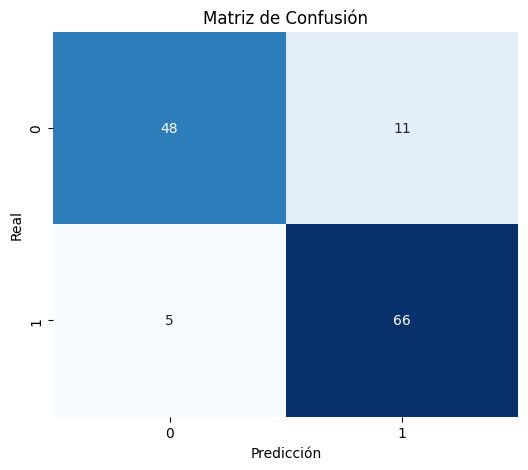

In [ ]:
# Graficarla
plt.figure(figsize=(6,5))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
print("Accuracy: {:.3f}".format(accuracy_score(y_val,y_pred)))
print("Recall: {:.3f}".format(recall_score(y_val, y_pred)))
print("F1-score: {:.3f}".format(f1_score(y_val, y_pred)))

Accuracy: 0.877
Recall: 0.930
F1-score: 0.892


# **Predicción y metricas con test 15%**

In [ ]:
#predicción
y_pred = nb_clf.predict(X_test)
#y_pred

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:.3f}".format(accuracy_score(y_test,y_pred)))

Accuracy: 0.869


In [ ]:
from sklearn.metrics import recall_score

print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))

Recall: 0.986


In [ ]:
from sklearn.metrics import f1_score

print("F1-score: {:.3f}".format(f1_score(y_test, y_pred)))

F1-score: 0.892


In [ ]:
auroc = roc_auc_score(y_test, y_pred)  # valor 0.87, 0.91, etc.
print("AUROC:", auroc)

AUROC: 0.8573645261398902


In [ ]:
error_rate = (y_test != y_pred).mean() * 100
print(f"Error Rate: {error_rate:.2f}%")

Error Rate: 13.08%


# **GAUSSIAN NAIVE BAYES**

In [ ]:
#Entrenamos con Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
g_clf = GaussianNB()
g_clf.fit(X_train.toarray(),y_train)

GaussianNB()

# **Predicción y metricas con val 15%**

In [ ]:
#predicción
y_pred = g_clf.predict(X_val.toarray())
#y_pred

# **METRICAS**

In [ ]:
from sklearn.metrics import confusion_matrix

g_cm = confusion_matrix(y_val, y_pred)
print(g_cm)

[[48 11]
 [ 3 68]]


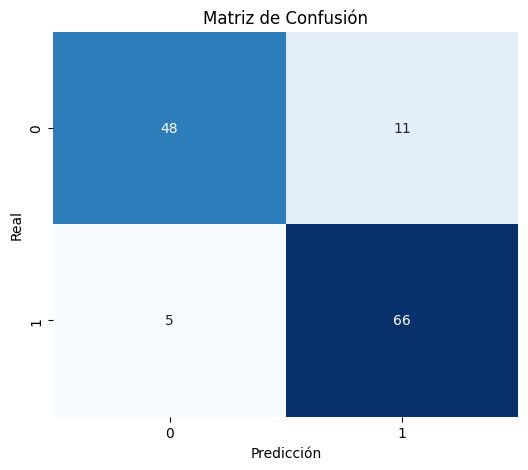

In [ ]:
# Graficarla
plt.figure(figsize=(6,5))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
print("Accuracy: {:.3f}".format(accuracy_score(y_val,y_pred)))
print("Recall: {:.3f}".format(recall_score(y_val, y_pred)))
print("F1-score: {:.3f}".format(f1_score(y_val, y_pred)))

Accuracy: 0.892
Recall: 0.958
F1-score: 0.907


# **Predicción y metricas con test 15%**

In [ ]:
#predicción
y_pred = nb_clf.predict(X_test)
#y_pred

In [ ]:
print("Accuracy: {:.3f}".format(accuracy_score(y_test,y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1-score: {:.3f}".format(f1_score(y_test, y_pred)))

Accuracy: 0.869
Recall: 0.986
F1-score: 0.892


In [ ]:
auroc = roc_auc_score(y_test, y_pred)  # valor 0.87, 0.91, etc.
print("AUROC:", auroc)

AUROC: 0.8573645261398902


In [ ]:
error_rate = (y_test != y_pred).mean() * 100
print(f"Error Rate: {error_rate:.2f}%")

Error Rate: 13.08%
